**Problem 1 (50 points)**

Write a function that converts the temperature in degrees Fahrenheit (⁰F) to degrees Celsius (⁰C) and to Kelvin (K).  
Using this function, plot a graph showing the variation in temperature in ⁰C and in K as the temperature in ⁰F varies 
from 0 to 250°F. 

Make appropriate comments.  

Tip: Python functions are defined using the **def** keyword.


In [19]:
# library imports
import numpy as np # to work with numerical data
import matplotlib.pyplot as plt # to plot graphs

In [20]:
N = 250 # number of temperatures
x = np.arange(0, N+1, 1) # temperature array

In [21]:
# conversion functions - from Fahrenheit to Celsius
def fahrenheit_to_celsius(x):
    '''Converts Fahrenheit to Celsius
    Args:
        x (float): temperature in Fahrenheit
    Returns:
        float: temperature in Celsius   

        Equation: (x - 32) * (5 / 9)
    '''
    return (x - 32) * (5 / 9)

# conversion functions - from Fahrenheit to Kelvin
def fahrenheit_to_kelvin(x):
    '''Converts Fahrenheit to Kelvin
    Args:
        x (float): temperature in Fahrenheit
    Returns:
        float: temperature in Kelvin

        Equation: (x - 32) * (5 / 9) + 273.15
    '''
    return fahrenheit_to_celsius(x) + 273.15

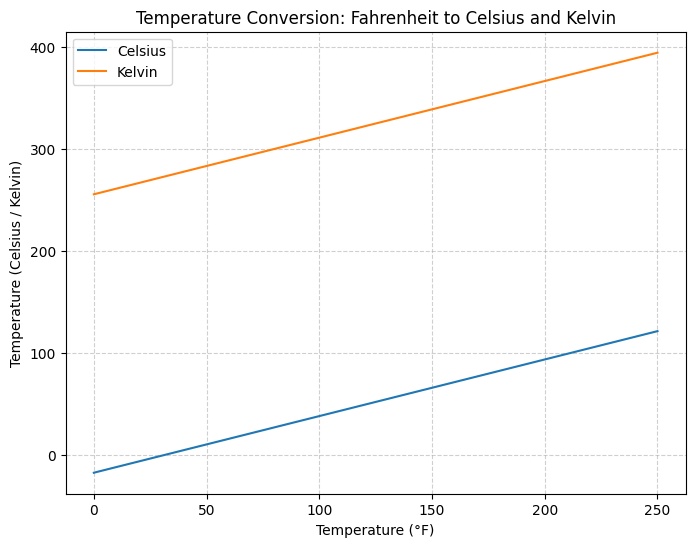

In [22]:
# Figure
# figure with size 8x6 inches
plt.figure(figsize=(8,6))

# plot the conversion functions
plt.plot(x, fahrenheit_to_celsius(x))
plt.plot(x, fahrenheit_to_kelvin(x))

# add title and labels
plt.title("Temperature Conversion: Fahrenheit to Celsius and Kelvin")
plt.xlabel("Temperature (°F)")
plt.ylabel("Temperature (Celsius / Kelvin)")
plt.legend(["Celsius", "Kelvin"])

# Add grid, legend, and improve visualization
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

**Comments**

It can be observed that the increments in Celsius and Kelvin temperatures are linearly proportional to the increase in Fahrenheit temperature.

**Problem 2 (50 points)**

Model, using difference equations, the trajectory (height x distance) of a projectile launched at an angle α0, from a height h_0, and with a velocity v0. 

Assume:
h0 = 10 m; 
v0 = 20 m/s. 

Perform the calculations for the scenarios with α0 = 0, 30°, 45°, and 60°, neglecting air resistance.  

Assume, for all four scenarios, time steps of 0.1, 0.5, and 1 seconds (three curves) and make appropriate comments.


In [23]:
def discrete_difference_model_trajectory(
    a: float,
    v0: float = 20,
    step: float = 0.1,
    max_time: float = 20,
    g: float = 9.81
):
    """
    Parameters:
        a (float): Angle in radians.
        v0 (float): Initial speed.
        step (float): Time step.
        max_time (float): Max simulation time.
        g (float): Gravity (default 9.81 m/s²).

    Returns:
        tuple: (v_x, v_y, x, y) as NumPy arrays, truncated when y <= 0.
    """
    # Time vector
    t = np.arange(0, max_time + step, step)
    N = len(t)

    # Initialize arrays
    x = np.zeros(N)
    y = np.zeros(N)
    v_x = np.zeros(N)
    v_y = np.zeros(N)

    # Set initial conditions
    x[0] = 0
    y[0] = 10
    v_x[0] = v0 * np.cos(a)
    v_y[0] = v0 * np.sin(a)

    # Trajectory calculation using discrete difference method
    for n in range(N - 1):
        v_x[n + 1] = v_x[n]  # No horizontal acceleration
        v_y[n + 1] = v_y[n] - g * step
        x[n + 1] = x[n] + v_x[n] * step
        y[n + 1] = y[n] + v_y[n] * step

        if y[n + 1] <= 0:
            # Truncate arrays when projectile hits the ground (y <= 0)
            break

    return v_x, v_y, x, y

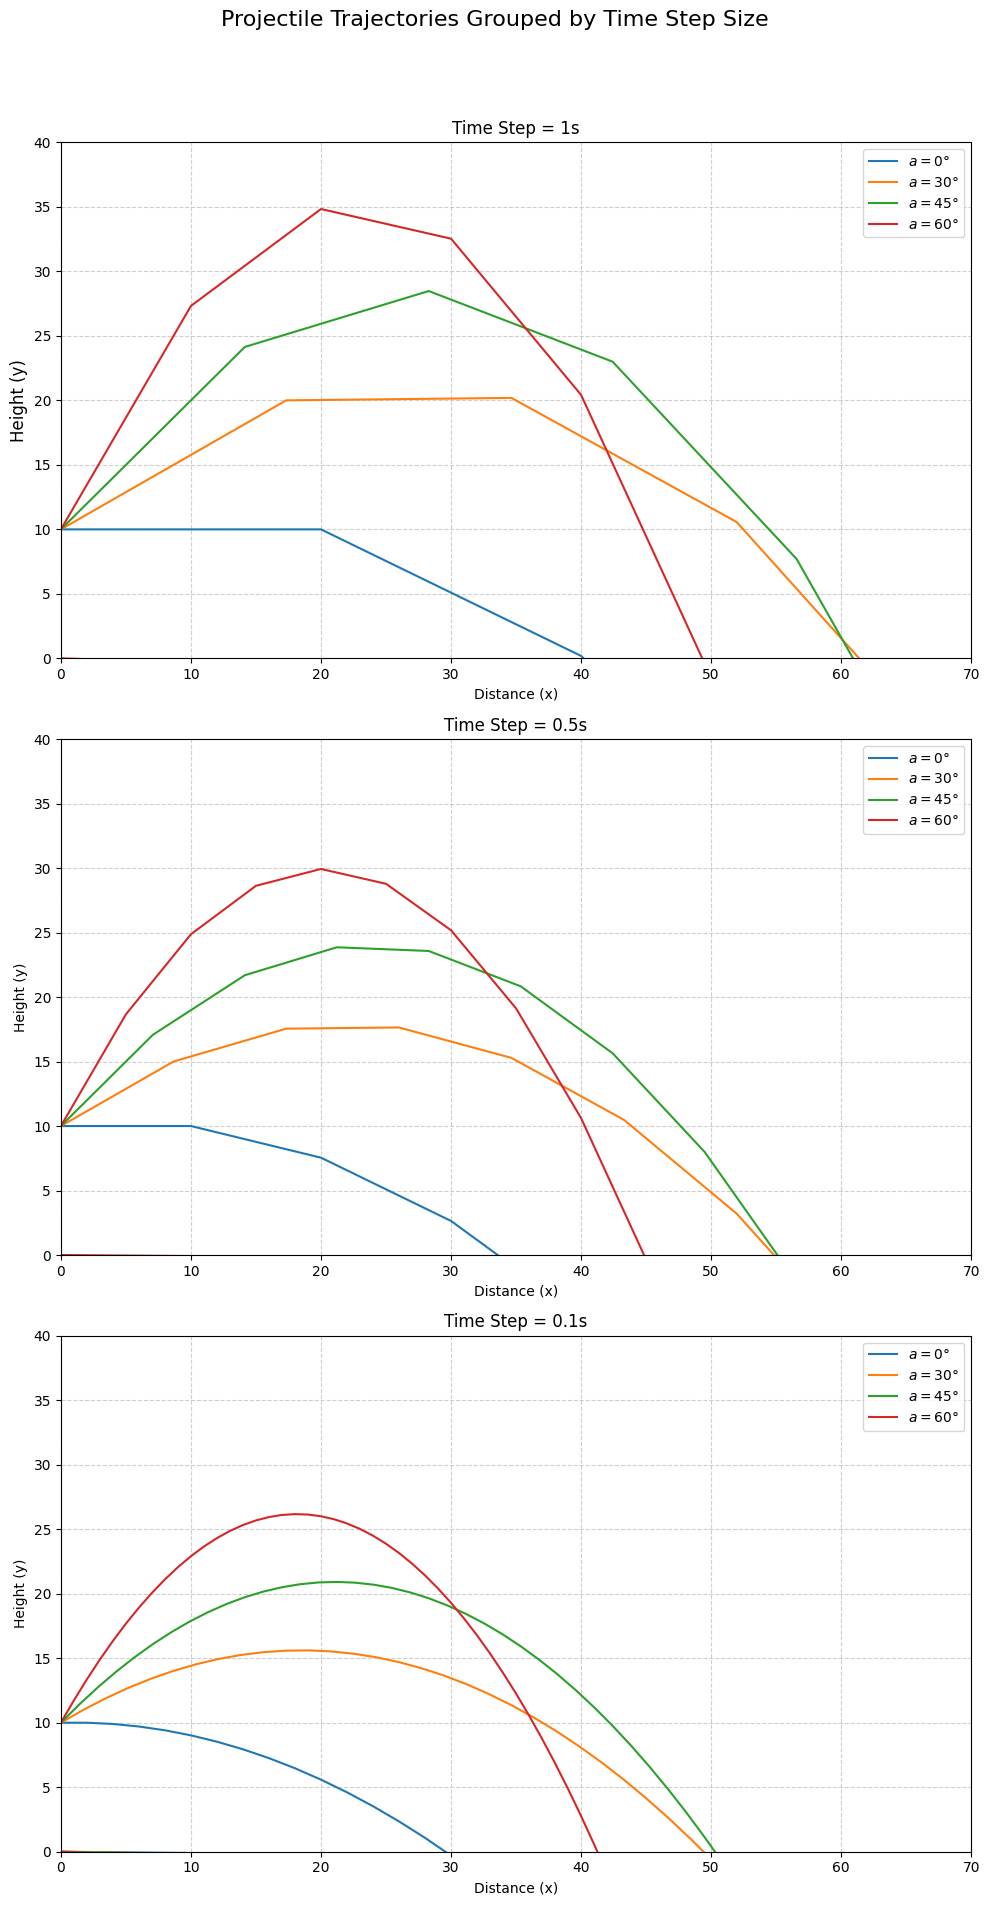

In [24]:

# Define the angles and their string representations in terms of pi
angles = [
    (0, "0°"),
    (np.pi / 6, "30°"),
    (np.pi / 4, "45°"),
    (np.pi / 3, "60°")
]
    
# Define the step sizes to be used
steps = [1, 0.5, 0.1]

# Create subplots for each step size
fig, axs = plt.subplots(3, 1, figsize=(10, 20), sharey=True) 

for idx, step in enumerate(steps):
    ax = axs[idx]
    for a, a_label in angles:
        v_x, v_y, x, y = discrete_difference_model_trajectory(a=a, step=step)
        label = f"$a={a_label}$"
        ax.plot(x, y, label=label)
    ax.set_xlabel("Distance (x)")
    ax.set_ylabel("Height (y)")
    ax.grid(True, linestyle="--", alpha=0.6) # Add grid to the plot

    if idx == 0:
        ax.set_ylabel("Height (y)", fontsize=12)
    ax.set_title(f"Time Step = {step}s", fontsize=12)
    ax.legend()
    ax.set_ylim([0, 40])  # Set y-axis limits to [0, 40]
    ax.set_xlim([0, 70])  # Set x-axis limits to [0, 70]

fig.suptitle("Projectile Trajectories Grouped by Time Step Size", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Comments**

When the projectile is launched at 0°, it travels horizontally and immediately begins to descend, following a straight, downward-sloping path until it hits the ground.

For 30°, 45°, 60°, as angle increases, the height of projectile increase too. However, the horizontal distance increases up to 45°, then decreases. This matches theoretical projectile motion behavior, where maximum distance occurs at 45° when ignoring air resistance.

Regarding the effect of time step size, lower time steps improve the accuracy of simulation.